In [24]:
# finding mirror-symmetric units in trained/untrained networks
# useful packages:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import matplotlib.gridspec as gridspec
import torchlens as tl
%matplotlib inline
import matplotlib.patheffects as pe
import pickle
import scipy
import scipy.io as sio
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import os
from statsmodels.stats.proportion import proportion_confint

In [25]:
# settings
# images
net_name = 'alexnet'
figname = 'figureS13'

names = ['conv1',
        'conv2',
        'conv3',
        'conv4',
        'conv5',
        'fc6',
        'fc7']
cdir = os.getcwd()
file_dir = f'{cdir}/'

colors = [[0.8500, 0.3250, 0.0980],[0, 0.4470, 0.7410]]

In [26]:
# load data from "Face detection in untrained deep neural networks" paper
res_mat = scipy.io.loadmat(f'{cdir}/untrained_mirror_symmetric_units.mat')
res_mats = list(res_mat.values())
layer_res = res_mats[4]
sel_cell_view_mat = res_mats[5]

res_mat_v1 = scipy.io.loadmat(f'{cdir}/untrained_mirror_symmetric_units_more_criteria.mat')
res_mats_v1 = list(res_mat_v1.values())
layer_res_v1 = res_mats_v1[4]
sel_cell_view_mat_v1 = res_mats_v1[5]

res_mat_v2 = scipy.io.loadmat(f'{cdir}/trained_mirror_symmetric_units_more_criteria.mat')
res_mats_v2 = list(res_mat_v2.values())
layer_res_v2 = res_mats_v2[4]
sel_cell_view_mat_v2 = res_mats_v2[5]

In [27]:
data = [[[],[]],[[],[]]]
units_ratio_mean = [[[],[]],[[],[]]]
units_ratio_std = [[[],[]],[[],[]]]
ci  = [[[],[]],[[],[]]]
conds = ['False','True']
sets = ['bfm','p04']
nrep = 10

i_set = 0
for i_cond in range(len(conds)):
    with open(f'{sets[0]}_{net_name}_pretrained_{conds[i_cond]}_mrr_units.pkl', 'rb') as f:
        data[i_set][i_cond] =  pickle.load(f)
    tmp = np.array(data[i_set][i_cond]['units_ratio'])
    units_ratio_mean[i_set][i_cond] = np.mean(tmp, axis=0)
    units_ratio_std[i_set][i_cond] = stats.sem(tmp, axis=0)
    if i_cond == 1:
        ci[i_set][1] = proportion_confint(count=data[i_set][1]['num_mrr_units'][0], nobs=data[i_set][1]['num_units'][0])
    else:
        ci[i_set][0] = stats.t.interval(0.95, nrep-1, loc=units_ratio_mean[i_set][0], scale=units_ratio_std[i_set][0])

i_set = 1
for i_cond in range(len(conds)):
    with open(f'{sets[0]}_{net_name}_pretrained_{conds[i_cond]}_mrr_units_wo_face_selectivity.pkl', 'rb') as f:
        data[i_set][i_cond] =  pickle.load(f)
    tmp = np.array(data[i_set][i_cond]['units_ratio'])
    units_ratio_mean[i_set][i_cond] = np.mean(tmp, axis=0)
    units_ratio_std[i_set][i_cond] = stats.sem(tmp, axis=0)
    if i_cond == 1:
        ci[i_set][1] = proportion_confint(count=data[i_set][1]['num_mrr_units'][0], nobs=data[i_set][1]['num_units'][0])
    else:
        ci[i_set][0] = stats.t.interval(0.95, nrep-1, loc=units_ratio_mean[i_set][0], scale=units_ratio_std[i_set][0])

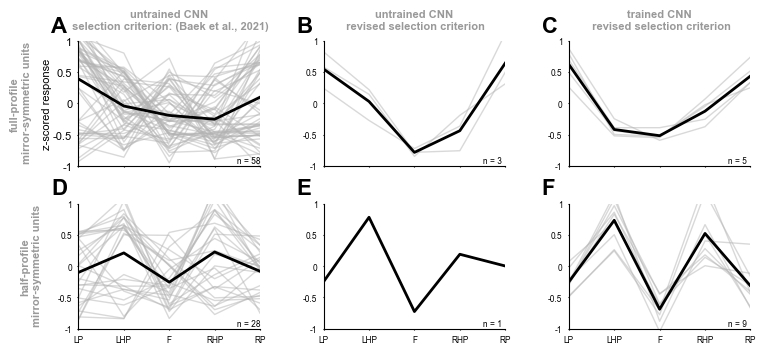

In [29]:
# plot the figure
fig = plt.figure(figsize=(7,3))
ncols = 3
nrows = 2
nview= 5
gs = gridspec.GridSpec(nrows, ncols, left=0.02, bottom=0.02, right=0.98, top=0.98, wspace=0.35, hspace=0.3)
labels = ['A','B', 'C', 'D', 'E', 'F']
x_pos = np.arange(0, nview, 1)  # This will give values for each degree
i_net = 0
for i, ax_ in enumerate(gs):
    ax = fig.add_subplot(ax_,zorder=2)

    if i == 0: # untrained netowrk paper, full profile symmetry, conv5
        matrix = np.squeeze(layer_res[4][0][sel_cell_view_mat[4][3] - 1])
        
        ax.set_title('untrained CNN\n selection criterion: (Baek et al., 2021)',pad = 15,
                      fontdict = {'fontsize': 8,
                         'fontweight': 'bold',
                         'color': [0.6,0.6,0.6],
                         'verticalalignment': 'center',
                         'horizontalalignment': 'center'})
        
        ax.annotate('full-profile\n mirror-symmetric units', xy=(0, 0.5), xytext=(-15, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                     ha='center', va='center',rotation=90,c=[0.6,0.6,0.6],
                     fontsize = 8,fontweight='bold')
        ax.text(3.5,-0.85,f'n = {matrix.shape[0]}', fontsize=6, fontweight='normal', va='top')

    if i== 1: # untrained netowrk paper, full profile symmetry (more criteria), conv5
        matrix = np.squeeze(layer_res_v1[4][0][sel_cell_view_mat_v1[4][3] - 1])
        ax.set_title('untrained CNN\n revised selection criterion',pad = 15,
                     fontdict = {'fontsize': 8,
                         'fontweight': 'bold',
                         'color': [0.6,0.6,0.6],
                         'verticalalignment': 'center',
                         'horizontalalignment': 'center'})
        ax.text(3.5,-0.85,f'n = {matrix.shape[0]}', fontsize=6, fontweight='normal', va='top')

    if i == 2: # untrained netowrk paper (trained model), full profile symmetry (more criteria), conv5
        matrix = np.squeeze(layer_res_v2[4][0][sel_cell_view_mat_v2[4][3] - 1])
        ax.set_title('trained CNN\n revised selection criterion',pad = 15,
                     fontdict = {'fontsize': 8,
                         'fontweight': 'bold',
                         'color': [0.6,0.6,0.6],
                         'verticalalignment': 'center',
                         'horizontalalignment': 'center'})
        ax.text(3.5,-0.85,f'n = {matrix.shape[0]}', fontsize=6, fontweight='normal', va='top')

    if i == 3: # untrained netowrk paper, half profile symmetry, conv5
        matrix = np.squeeze(layer_res[4][0][sel_cell_view_mat[4][4] - 1])
        ax.annotate('half-profile\n mirror-symmetric units', xy=(0, 0.5), xytext=(-15, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                ha='center', va='center',rotation=90,c=[0.6,0.6,0.6],
                fontsize = 8,fontweight='bold')
        ax.text(3.5,-0.85,f'n = {matrix.shape[0]}', fontsize=6, fontweight='normal', va='top')

    if i== 4: # untrained netowrk paper, half profile symmetry (more criteria), conv5
        matrix = np.squeeze(layer_res_v1[4][0][sel_cell_view_mat_v1[4][4] - 1])
        if matrix.ndim == 1:
            matrix = matrix.reshape(1, -1)
        ax.text(3.5,-0.85,f'n = {matrix.shape[0]}', fontsize=6, fontweight='normal', va='top')

    if i == 5: #  untrained netowrk paper (trained model), half profile symmetry (more criteria), conv5
        matrix = np.squeeze(layer_res_v2[4][0][sel_cell_view_mat_v2[4][4] - 1])
        ax.text(3.5,-0.85,f'n = {matrix.shape[0]}', fontsize=6, fontweight='normal', va='top')

    normalized_matrix = (matrix - np.mean(matrix, axis=1).reshape(-1,1)) / np.std(matrix, axis=1).reshape(-1,1) # z-score
    reshaped_matrix = normalized_matrix.reshape(normalized_matrix.shape[0], -1, 10) # 10 identities
    mrr_res = reshaped_matrix.mean(axis=2).T
    plt.plot(mrr_res, color=[0.7,0.7,0.7], alpha=0.5, lw=1, clip_on=True)
    plt.plot(np.nanmean(mrr_res,axis=1), color=[0,0,0], alpha=1, lw=2, clip_on=True)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.text(-0.15,1.2, labels[i],transform=ax.transAxes, fontsize=16, fontweight='bold', va='top')


    ax.set_yticks([-1, -0.5, 0, 0.5, 1])
    ax.set_yticklabels([-1, -0.5, 0, 0.5, 1])

    ax.set_xlim([x_pos[0],x_pos[-1]])
    ax.set_ylim([-1, 1])

    if np.isin(i,[3,4,5]): 
        ax.set_xticks(list(x_pos))
        ax.set_xticklabels(['LP','LHP', 'F', 'RHP', 'RP'])
    else:
        ax.set_xticks(list(x_pos))
        ax.set_xticklabels('')
    
    if i == 0:
        ax.set_ylabel('z-scored response',labelpad=1) 


    # font and tick params
    plt.tick_params(length = 1, width = 0.8)
    mpl.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 6
    plt.rcParams['axes.linewidth'] = 0.8



plt.tight_layout()
plt.savefig('figureS15.pdf',dpi=300,bbox_inches='tight',facecolor='w',pad_inches=0)
plt.show()

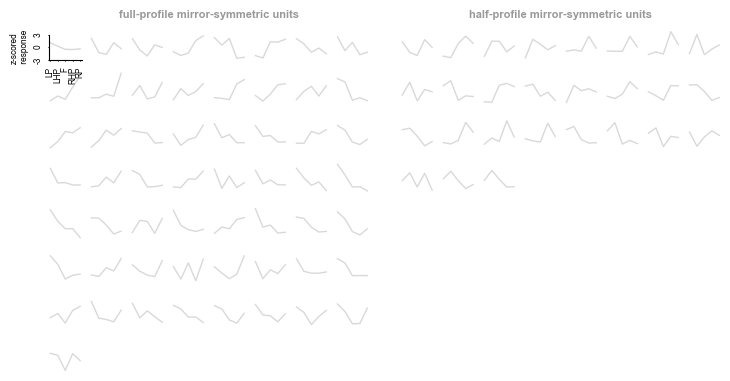

In [30]:
fig = plt.figure(figsize=(7,3.5))
ncols = 2
nrows = 1
gs = gridspec.GridSpec(nrows, ncols, left=0.02, bottom=0.02, right=0.98, top=0.98, wspace=0.1, hspace=0.0)
x_pos = [0,1,2,3,4]

# full profile
for i in range(2):
    inner_gs = gridspec.GridSpecFromSubplotSpec(8, 8, subplot_spec=gs[i], wspace=0.25, hspace=0.8)

    matrix = np.squeeze(layer_res[4][0][sel_cell_view_mat[4][3+i] - 1])
    normalized_matrix = (matrix - np.mean(matrix, axis=1).reshape(-1,1)) / np.std(matrix, axis=1).reshape(-1,1) # z-score
    reshaped_matrix = normalized_matrix.reshape(normalized_matrix.shape[0], -1, 10) # 10 identities
    mrr_res = reshaped_matrix.mean(axis=2).T

    counter = 0
    ax1 = fig.add_subplot(gs[0])
    ax1.set_title('full-profile mirror-symmetric units',pad = 15,
                     fontdict = {'fontsize': 8,
                         'fontweight': 'bold',
                         'color': [0.6,0.6,0.6],
                         'verticalalignment': 'center',
                         'horizontalalignment': 'center'})
    ax1.axis('off')

    ax2 = fig.add_subplot(gs[1])
    ax2.set_title('half-profile mirror-symmetric units',pad = 15,
                     fontdict = {'fontsize': 8,
                         'fontweight': 'bold',
                         'color': [0.6,0.6,0.6],
                         'verticalalignment': 'center',
                         'horizontalalignment': 'center'})
    ax2.axis('off')
    
    for i_row in range(8):
        for i_col in range(8):
            counter += 1
            if counter < mrr_res.shape[1]:
                ax = fig.add_subplot(inner_gs[i_row, i_col],facecolor='none')
                ax.plot(x_pos,mrr_res[:,counter], color=[0.7,0.7,0.7], alpha=0.5, lw=1, clip_on=False,  zorder=1)
                ax.set_xticks([])
                ax.set_yticks([])   
                ax.set_ylim(-1,1)
            else:
                continue

            if counter == 1 and i == 0:
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                ax.set_ylabel('z-scored\n response',labelpad=3, fontsize=6)
                ax.set_xticks(list(x_pos))
                ax.set_xticklabels(['LP','LHP', 'F', 'RHP', 'RP'],rotation=90,fontsize=6)
                ax.xaxis.label.set_zorder(2)
                ax.set_yticks([-3, 0, 3])
                ax.set_yticklabels(['-3','0', '3'],rotation=90,fontsize=6)
                   
                # font and tick params
                plt.tick_params(length = 1, width = 0.8)
                mpl.rcParams['font.family'] = 'Arial'
                plt.rcParams['font.size'] = 6
                plt.rcParams['axes.linewidth'] = 0.8


            else:
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
                ax.spines['left'].set_visible(False)


plt.tight_layout()
plt.savefig('figureS14.pdf',dpi=300,bbox_inches='tight',facecolor='w',pad_inches=0)
plt.show()

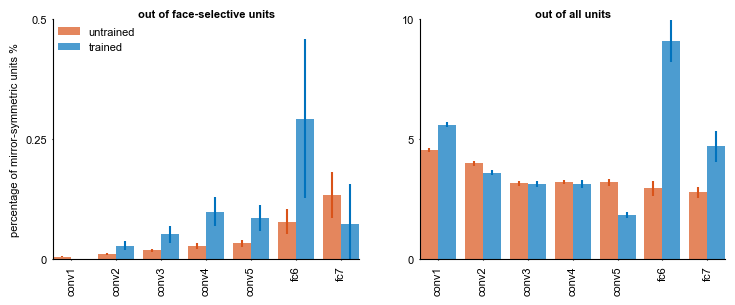

In [36]:
# plot the figure
fig = plt.figure(figsize=(7,2.5))
ncols = 2
nrows = 1
nview= 5
gs = gridspec.GridSpec(nrows, ncols, left=0.02, bottom=0.02, right=0.98, top=0.98, wspace=0.2, hspace=0.0)
cond_names = ['out of face-selective units','out of all units']
labels = ['A','B']
colors = [[0.8500, 0.3250, 0.0980],[0, 0.4470, 0.7410]]

models = ['untrained', 'trained']
for i, ax_ in enumerate(gs):
    ax = fig.add_subplot(ax_,zorder=2)

    for j in range(2):
        x_pos = np.arange(0, len(names), 1) + 0.4 * j  # This will give values for each degree
        mean_ = units_ratio_mean[i][j]
        ci_low = mean_ - ci[i][j][0]
        ci_up = ci[i][j][1] - mean_
        plt.bar(x_pos, mean_, color=colors[j],width=0.4,clip_on=False,alpha=0.7,label=models[j])
        plt.errorbar(x =x_pos,y = mean_, yerr =[ ci_low, ci_up], ecolor=colors[j],capsize=0,ls='none')

    ax.set_title(cond_names[i],pad = -10,
                fontdict = {'fontsize': 8,
                    'fontweight': 'bold',
                    'color': [0,0,0],
                    'verticalalignment': 'center',
                    'horizontalalignment': 'center'})
    
    if i == 0:
        ax.set_ylabel('percentage of mirror-symmetric units %')
        ax.legend(bbox_to_anchor=(0, 0.01, 0.3,1),frameon=False,prop={'size': 8}) # (0.01, 0.03, 0.15,1.1)

    
        ax.set_yticks([0, 0.0025, 0.005])
        ax.set_yticklabels([0, 0.25, 0.5]) # np.multiply([0, 0.0025, 0.005],100)

        ax.set_xlim([x_pos[0]-0.6,x_pos[-1]+0.2])
        ax.set_ylim([0,0.005])

    elif i == 1:
        ax.set_yticks([0, 0.05, 0.1])
        ax.set_yticklabels([0, 5, 10]) # np.multiply([0, 0.05, 0.1],100)

        ax.set_xlim([x_pos[0]-0.6,x_pos[-1]+0.2])
        ax.set_ylim([0,0.1])

    

    ax.set_xticks(list(x_pos-0.2))
    ax.set_xticklabels(names,rotation = 90)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # font and tick params
    plt.tick_params(length = 1, width = 0.8)
    mpl.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 8
    plt.rcParams['axes.linewidth'] = 0.8

plt.tight_layout()
plt.savefig('figureS16.pdf',dpi=300,bbox_inches='tight',facecolor='w',pad_inches=0)
plt.show()